In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq 
from scipy import signal
from scipy.fft import fftshift 

In [18]:
#df = pd.read_csv("C:/Users/JackC/Documents/TU Delft/BAP/Measurements/Blinking.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/TU Delft/BAP/Measurements/Physcial clincing right forearm.csv", sep=",")
df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt/EEGdata-2024-156--14-58-57.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt_labels/Label_2024-144--15-54-35_1.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_Test/Label0Test.csv", sep=",")
#df = pd.read_csv('C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt_ICA/EEGdata-2024-144--15-54-35_ICA.csv', sep = ",")
end = df.shape[0] - 5
fs = 250
df = df.iloc[:end, :8] # 3000 samples is 12 seconds of data
df

,FZ,C3,CZ,C4,PZ,PO7,OZ,PO8
0,223991.578125,244161.078125,241694.250000,241833.015625,219063.015625,240269.734375,201349.703125,229073.734375
1,223939.093750,243954.281250,241071.890625,241746.203125,218498.234375,239942.140625,200976.875000,228804.093750
2,223958.328125,243909.218750,240954.406250,241753.078125,218377.890625,239862.578125,200877.734375,228760.640625
3,224016.171875,244091.250000,241509.265625,241835.609375,218870.890625,240144.109375,201192.000000,229002.484375
4,224038.703125,244256.656250,241984.281250,241891.390625,219310.765625,240407.687500,201495.437500,229205.703125
...,...,...,...,...,...,...,...,...
71995,223216.062500,243455.031250,240802.234375,238486.859375,218710.578125,238892.687500,200505.796875,228121.828125
71996,223168.593750,243386.015625,240567.718750,238435.718750,218509.234375,238788.796875,200394.125000,228011.937500
71997,223110.296875,243187.531250,239968.156250,238351.687500,217964.828125,238473.812500,200033.281250,227750.515625
71998,223121.656250,243130.843750,239813.484375,238345.875000,217817.218750,238376.359375,199915.625000,227694.453125


In [19]:
# Define the segment size
prompt_size = 1500
prompts = end/prompt_size

for i in range(int(prompts)):
    df.iloc[1500*i : 1500*(i+1)] = signal.detrend(df.iloc[1500*i : 1500*(i+1)], axis = 0)

df_filt_detr = np.array(df)

In [20]:
from scipy.signal import butter, lfilter, lfilter_zi
from scipy import signal

# Define the filter parameters
lowcut = 6
highcut = 30
fs = 250  # Sampling frequency

# Calculate the filter coefficients
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(8, [low, high], btype='band')

# Apply the filter to each column of the DataFrame
df_filt = lfilter(b, a, df_filt_detr, axis = 0)

# import scipy.signal as signal

# Define the notch filter parameters
fs = 250  # Sampling frequency
f0 = 50  # Notch frequency
Q = 1 # Quality factor

# Design the notch filter
b, a = signal.iirnotch(f0, Q, fs)

# Apply the filter to each column of the DataFrame
df_filt1 = lfilter(b, a, df_filt, axis = 0)

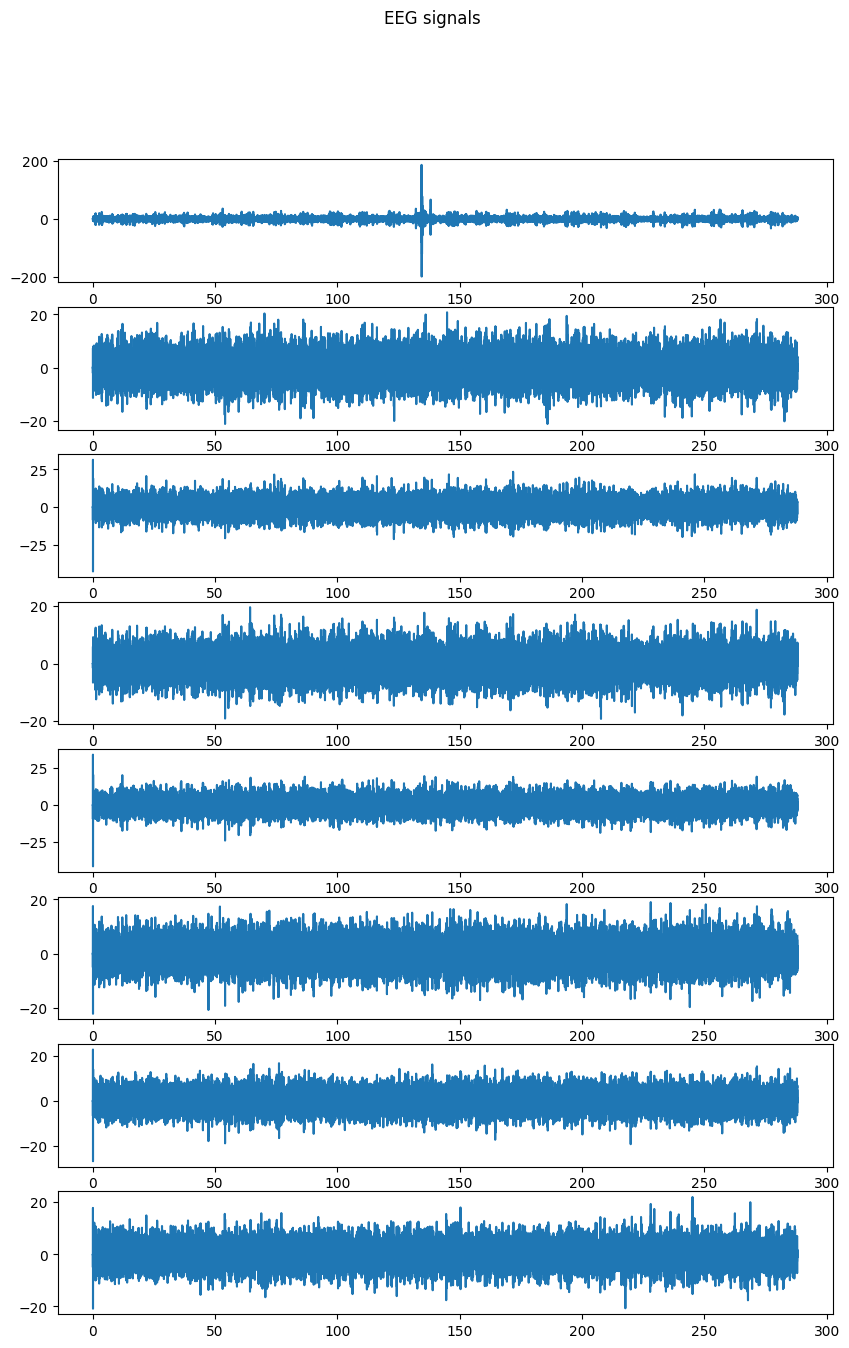

In [21]:
x1 = np.linspace(0, end/fs, end, endpoint=True)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals')
for i in range(8):
    axs[i].plot(x1,df_filt1[:,i])

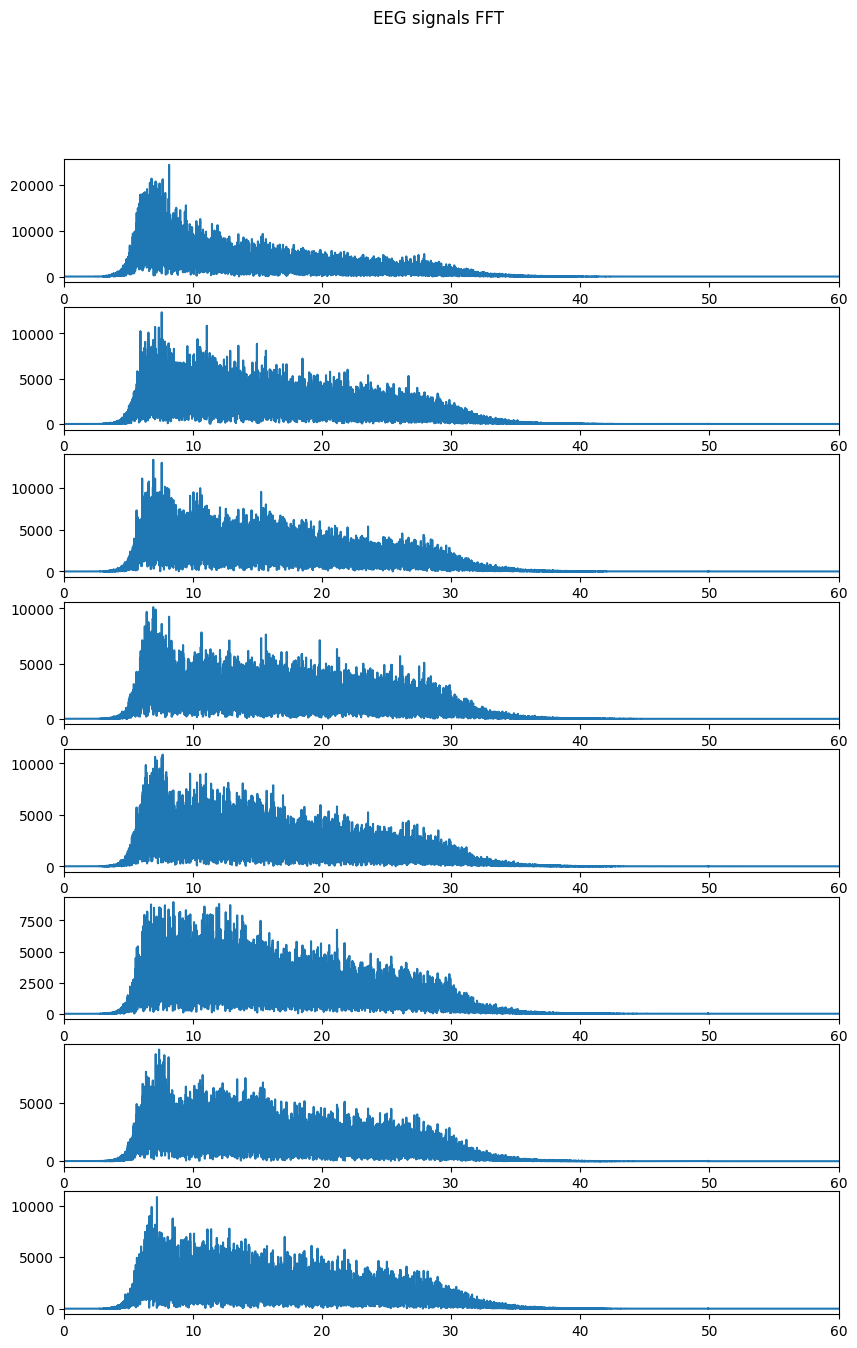

In [22]:
xf = rfftfreq(end, 1 / fs)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals FFT')
for i in range(8):
    yf = rfft(df_filt1[:,i])
    axs[i].plot(xf, np.abs(yf))
    axs[i].set_xlim([0, 60])
    # Setting the number of ticks 
    axs[i].locator_params(axis='x', nbins=10)
    

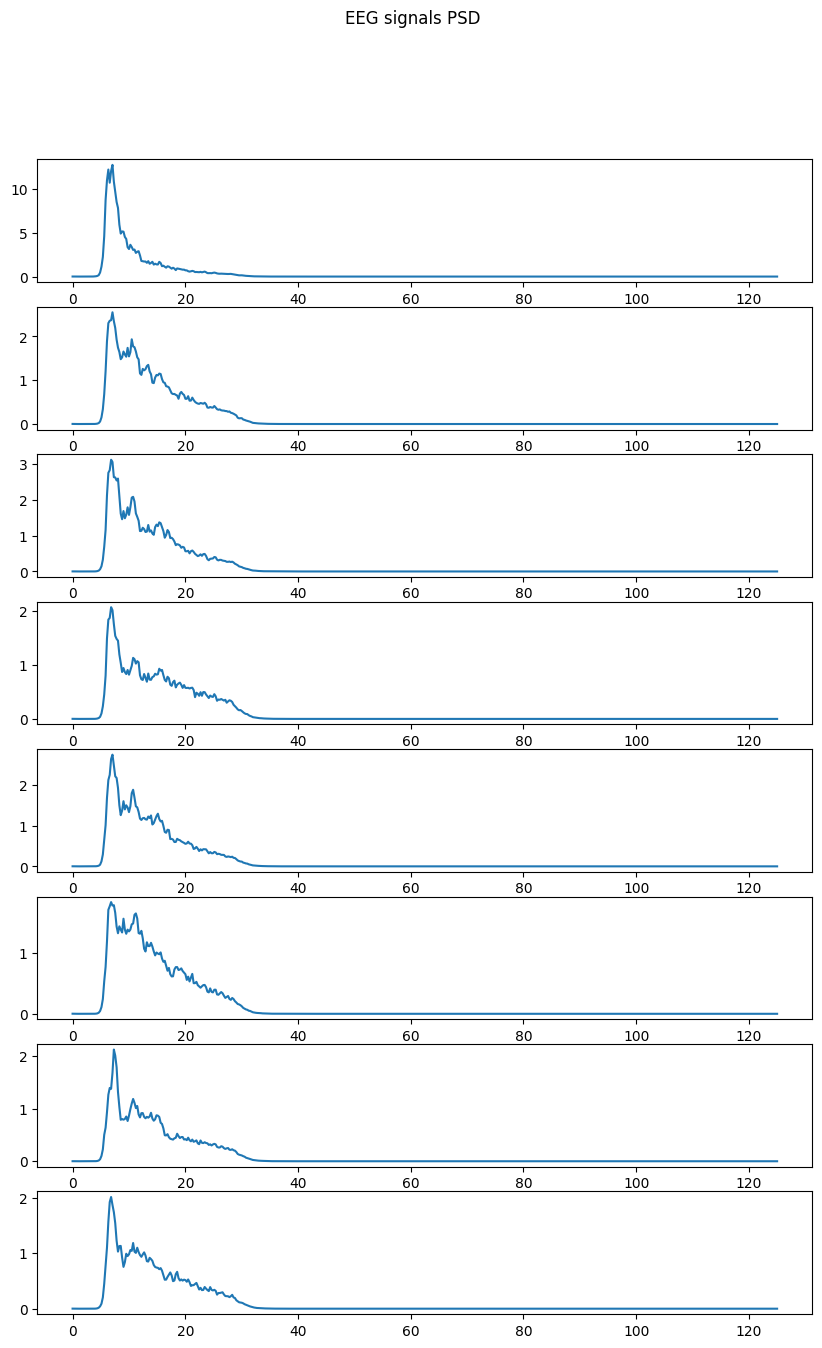

In [23]:
from scipy import signal

xf = rfftfreq(end, 1 / fs)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals PSD')
for i in range(8):
    # Compute the power spectral density
    frequencies, power_density = signal.welch(df_filt1[:,i], fs, nperseg=1024, scaling='density')


    # Plot the power spectral density
    axs[i].plot(frequencies, power_density)
    #plt.psd(df[:,i], Fs = 250)
    #axs[i].xlabel('Frequency (Hz)')
    #axs[i].ylabel('Power Spectral Density')
    #axs[i].title('Power Spectral Density Plot')


